# Chapter 5 - Computational Simulation

1. [Randomness in Python](#1)
2. [Monte Carlo Simulation to estimate pi](#2)
3. [Simulating Probability Distributions](#3)
4. [Boostrap Sampling](#4)
5. [Random Walk Simulation](#5)

## 1. Randomness in Python <a id="1"></a>

In [54]:
import random
import numpy as np

# Pseudo-random number (deterministic if seed is set)
random.seed(42)
print(random.random())  # Random float between 0 and 1

# NumPy pseudo-random number
np.random.seed(42)
print(np.random.randint(0, 10))  # Random integer between 0 and 9

0.6394267984578837
6


## 2. Monte Carlo Simulation to estimate pi <a id="2"></a>

In [40]:
import numpy as np

n_samples = 1000
x = np.random.uniform(-1, 1, n_samples)
y = np.random.uniform(-1, 1, n_samples)
in_circle = x**2 + y**2 <= 1

pi_estimate = 4 * np.sum(in_circle) / n_samples
print(f"Estimated π: {pi_estimate}")

Estimated π: 3.196


## 3. Simulating Probability Distributions <a id="3"></a>

### 3.1 Normal Distribution

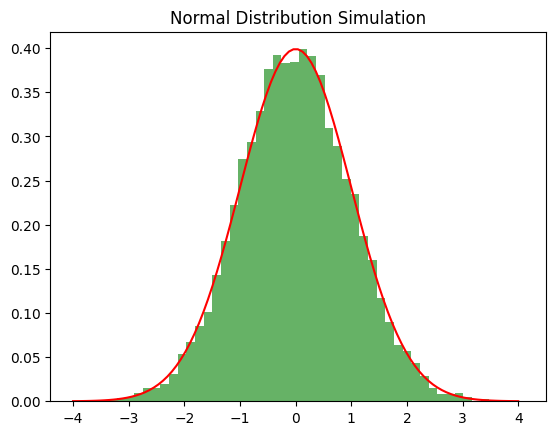

In [49]:
import matplotlib.pyplot as plt
from scipy.stats import norm

samples = np.random.normal(loc=0, scale=1, size=10000)
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1), 'r')
plt.title("Normal Distribution Simulation")
plt.show()

### 3.2 Bernouilli and Binomial Distribution

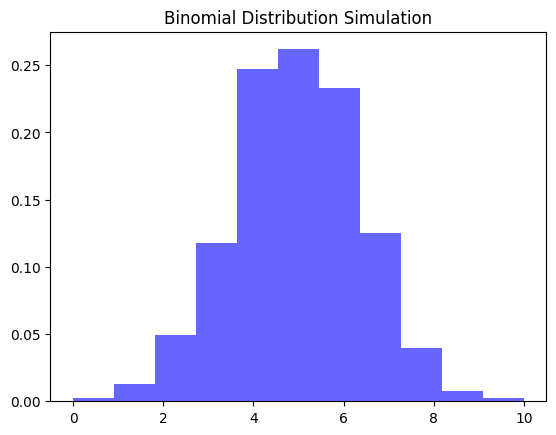

In [48]:
from scipy.stats import bernoulli, binom

p = 0.5
n_trials = 10
bern_samples = bernoulli.rvs(p, size=1000)
binom_samples = binom.rvs(n_trials, p, size=1000)

plt.hist(binom_samples, bins=n_trials+1, density=True, alpha=0.6, color='b')
plt.title("Binomial Distribution Simulation")
plt.show()

### 3.3 Poisson Distribution

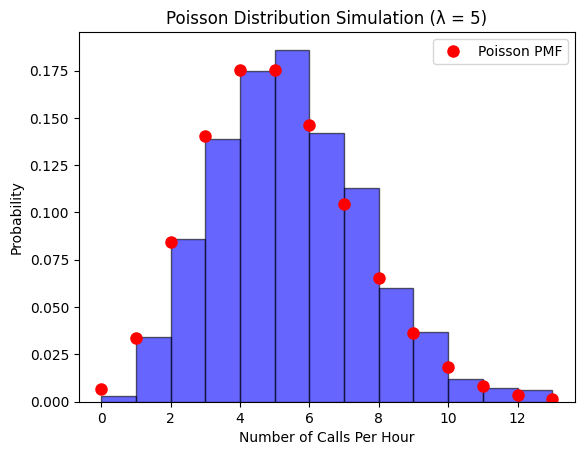

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

lambda_ = 5  # Average number of calls per hour

samples = np.random.poisson(lambda_, 1000)  # 1000 hours of call center activity

plt.hist(samples, bins=range(0, max(samples) + 1), density=True, alpha=0.6, color='b', edgecolor='black')

# Overlay the theoretical Poisson PMF
x = np.arange(0, max(samples) + 1)
plt.plot(x, poisson.pmf(x, lambda_), 'ro', markersize=8, label="Poisson PMF")

plt.title("Poisson Distribution Simulation (λ = 5)")
plt.xlabel("Number of Calls Per Hour")
plt.ylabel("Probability")
plt.legend()
plt.show()

### 3.4 Exponential Distribution

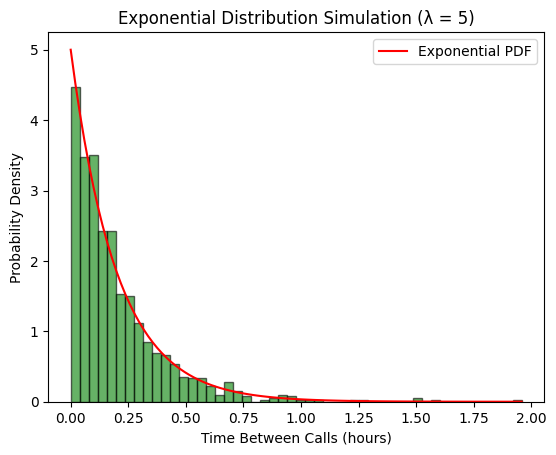

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

lambda_ = 5  # Average calls per hour

samples = np.random.exponential(1/lambda_, 1000)  # 1000 inter-arrival times

plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Overlay the theoretical Exponential PDF
x = np.linspace(0, max(samples), 100)
plt.plot(x, expon.pdf(x, scale=1/lambda_), 'r', label="Exponential PDF")

plt.title("Exponential Distribution Simulation (λ = 5)")
plt.xlabel("Time Between Calls (hours)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

## 4. Boostrap Sampling <a id="4"></a>

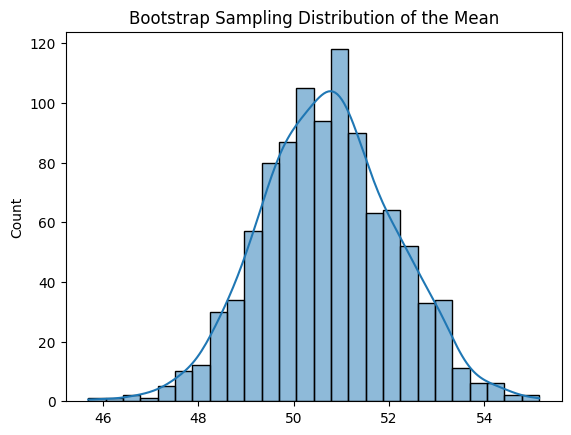

In [56]:
import seaborn as sns

data = np.random.normal(50, 15, 100)
bootstrap_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(1000)]

sns.histplot(bootstrap_means, kde=True)
plt.title("Bootstrap Sampling Distribution of the Mean")
plt.show()

## 5. Random Walk Simulation <a id="5"></a>

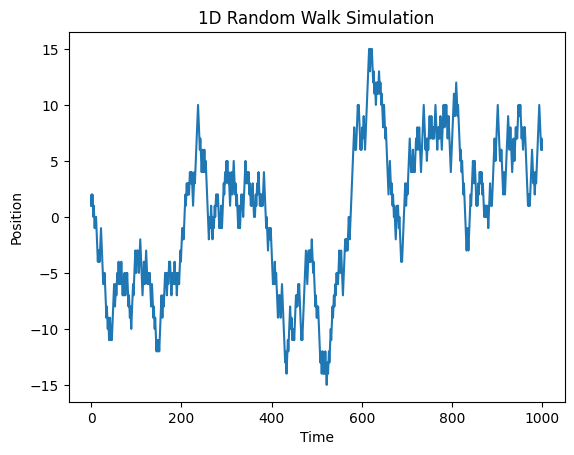

In [52]:
n_steps = 1000
steps = np.random.choice([-1, 1], size=n_steps)
position = np.cumsum(steps)

plt.plot(position)
plt.title("1D Random Walk Simulation")
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()